In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import functions

# input daily

In [ ]:
%%time
landcover_n = 4
landcover = f'landcover{landcover_n}'
location = 'mustang'

# folder_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/{landcover_n}landcover_mean/{location}_climate_cut'

folder_path = f'/Volumes/Extreme SSD/202409_paper2_modelruns/30years/SL_daily/{landcover_n}landcover_25percent/{location}_climate_cut'
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2','band_data']] 

column = 'dfs'
freq = 'month'

result_df = pd.DataFrame()


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file 
    
    if os.path.isfile(file_path): #check if its there 
        # read file 
        output_df = pd.read_csv(file_path)
        # count dfs per given time 
        output_df = functions.count_dfs_per_time(output_df, column, freq)
        
        # take the COUNT column 
        name_column = output_df['count']
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)


# output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'
output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_25percent/'
# annaul_df_count.to_csv(output + f'{location}_monthly_df_count_25percent_{landcover}.csv')



# input once per year

In [ ]:
%%time
landcover_n = 4
landcover = f'landcover{landcover_n}'
location = 'mustang'

folder_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/{landcover_n}landcover_mean/{location}_climate_cut'
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2','band_data']] 

column = 'dfs'
freq = 'month'

result_df = pd.DataFrame()


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file 
    
    if os.path.isfile(file_path): #check if its there 
        # read file 
        output_df = pd.read_csv(file_path)
        # count dfs per given time 
        output_df = functions.count_dfs_per_time(output_df, column, freq)
        
        # take the COUNT column 
        name_column = output_df['count']
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)


output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'
# annaul_df_count.to_csv(output + f'{location}_monthly_df_count_annualmean_{landcover}.csv')


In [ ]:
# annaul_df_count

In [2]:
def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 


# input daily

In [3]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_mean_annual/'

langtang1 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover4.csv', index_col = 0)

langtang1_melt_daily = prepare_dfcount_for_plot(langtang1)
langtang2_melt_daily = prepare_dfcount_for_plot(langtang2)
langtang3_melt_daily = prepare_dfcount_for_plot(langtang3)
langtang4_melt_daily = prepare_dfcount_for_plot(langtang4)



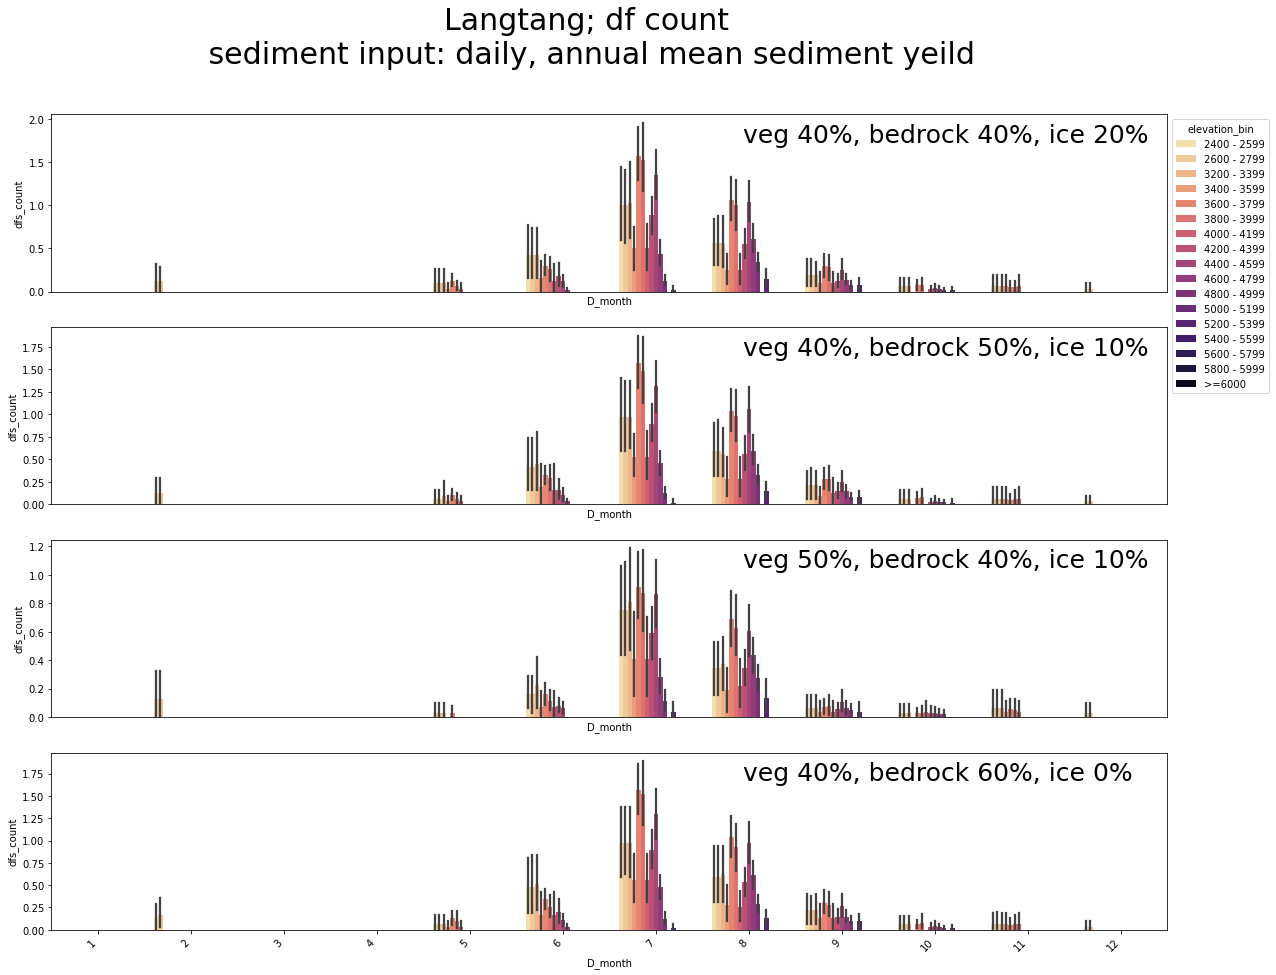

In [4]:
fig = plt.figure(figsize=(20, 15))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


# sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt)#, palette = 'magma_r') 

sns.barplot(ax = mosaic['a'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang1_melt_daily, palette = 'magma_r', legend = True) 
sns.barplot(ax = mosaic['b'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang2_melt_daily, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['c'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang3_melt_daily, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['d'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang4_melt_daily, palette = 'magma_r', legend = False)

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
# mosaic['a'].set(xlabel=None)
# mosaic['b'].set(xlabel=None)
# mosaic['c'].set(xlabel=None)
# mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")
sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))

fig.suptitle('Langtang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)

plt.show()


In [5]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_25percent/'

langtang1 = pd.read_csv(path + 'langtang_monthly_df_count_25percent_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_monthly_df_count_25percent_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_monthly_df_count_25percent_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_monthly_df_count_25percent_landcover4.csv', index_col = 0)

langtang1_melt_daily_25percent = prepare_dfcount_for_plot(langtang1)
langtang2_melt_daily_25percent = prepare_dfcount_for_plot(langtang2)
langtang3_melt_daily_25percent = prepare_dfcount_for_plot(langtang3)
langtang4_melt_daily_25percent = prepare_dfcount_for_plot(langtang4)



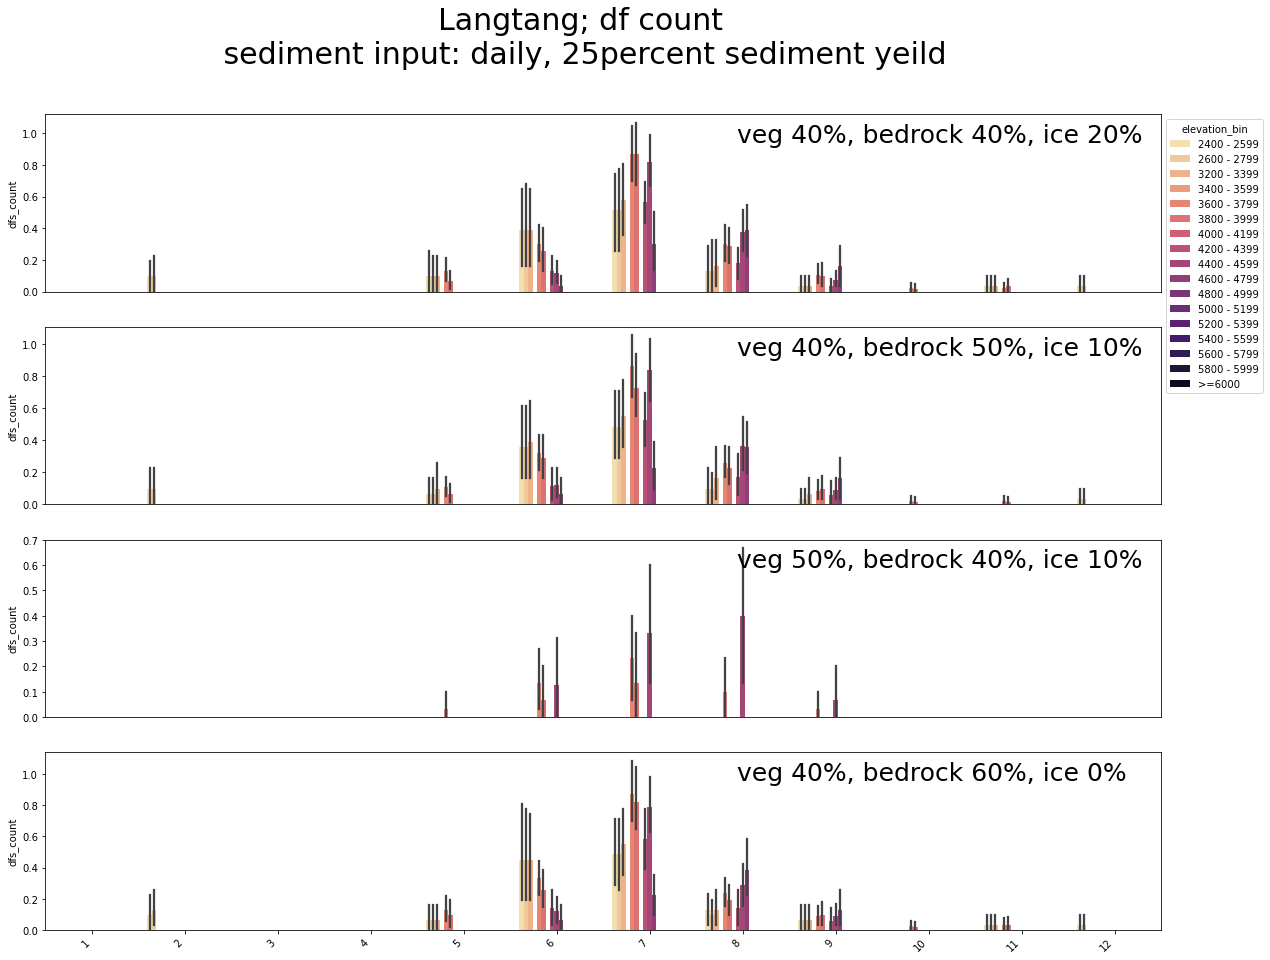

In [11]:
fig = plt.figure(figsize=(20, 15))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


# sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt)#, palette = 'magma_r') 

sns.barplot(ax = mosaic['a'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang1_melt_daily_25percent, palette = 'magma_r', legend = True) 
sns.barplot(ax = mosaic['b'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang2_melt_daily_25percent, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['c'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang3_melt_daily_25percent, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['d'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang4_melt_daily_25percent, palette = 'magma_r', legend = False)

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")
sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))

fig.suptitle('Langtang; df count \n sediment input: daily, 25percent sediment yeild ', fontsize=30)

plt.show()


# input once per year 

In [8]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'

langtang1 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_monthly_df_count_annualmean_landcover4.csv', index_col = 0)

langtang1_melt_once = prepare_dfcount_for_plot(langtang1)
langtang2_melt_once = prepare_dfcount_for_plot(langtang2)
langtang3_melt_once = prepare_dfcount_for_plot(langtang3)
langtang4_melt_once = prepare_dfcount_for_plot(langtang4)




In [9]:

langtang4_melt_daily['dfs_count'].equals(langtang4_melt_once['dfs_count'])


False

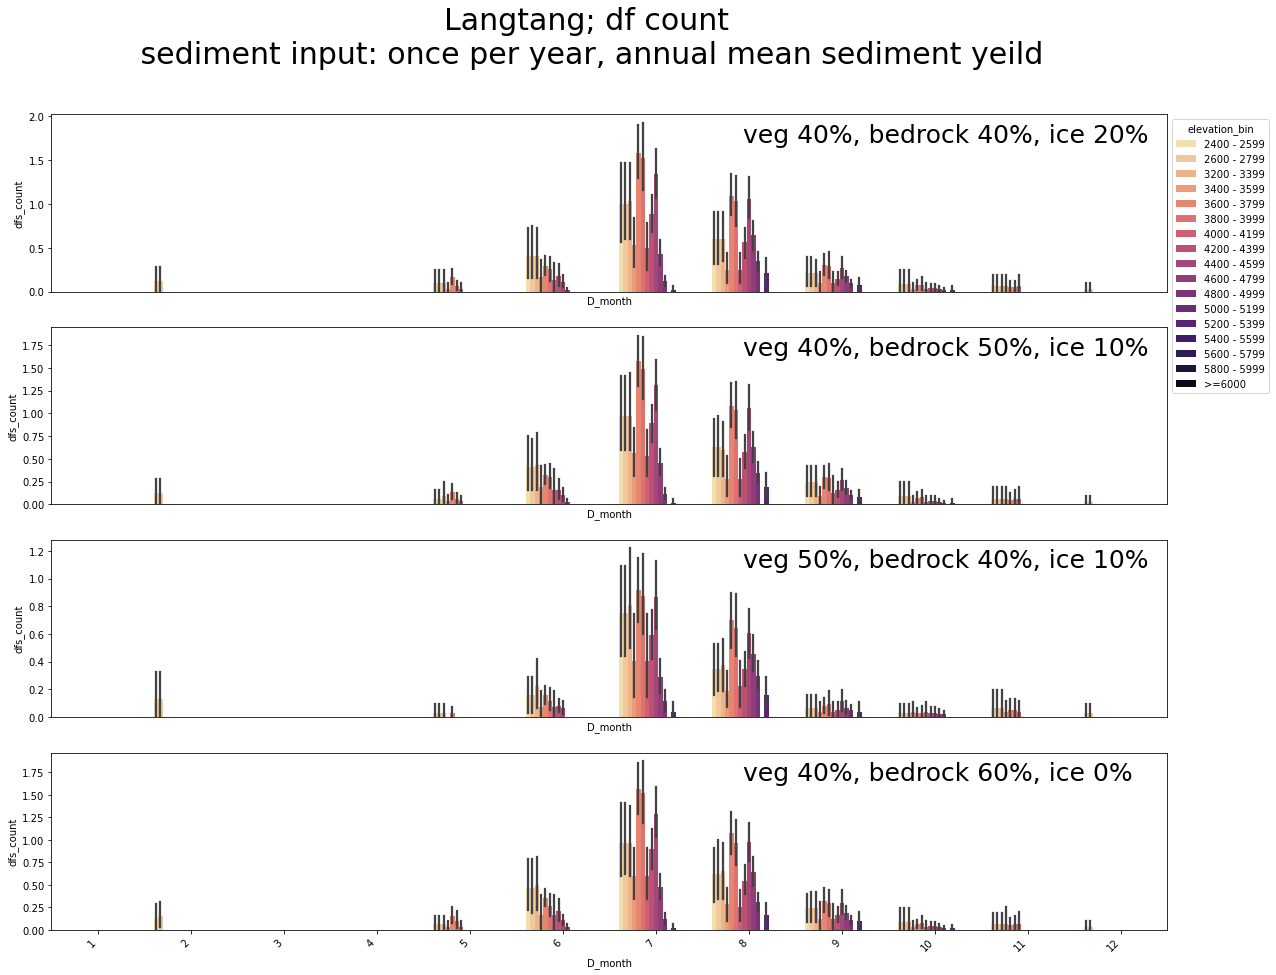

In [10]:
fig = plt.figure(figsize=(20, 15))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


# sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt)#, palette = 'magma_r') 
# sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt)#, palette = 'magma_r') 

sns.barplot(ax = mosaic['a'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang1_melt_once, palette = 'magma_r', legend = True) 
sns.barplot(ax = mosaic['b'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang2_melt_once, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['c'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang3_melt_once, palette = 'magma_r', legend = False)
sns.barplot(ax = mosaic['d'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=langtang4_melt_once, palette = 'magma_r', legend = False)

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
# mosaic['a'].set(xlabel=None)
# mosaic['b'].set(xlabel=None)
# mosaic['c'].set(xlabel=None)
# mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")
sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))

fig.suptitle('Langtang; df count \n sediment input: once per year, annual mean sediment yeild ', fontsize=30)

plt.show()

